In [36]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt


import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data=pd.read_csv("data/train_data.csv")
valid_data=pd.read_csv("data/valid_data.csv")

In [3]:
print(train_data.shape)
train_data.head()

(578, 2)


,Date,count
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2


In [4]:
print(valid_data.shape)
valid_data.head()

(184, 2)


,Date,count
0,2014-03-26,198
1,2014-03-27,120
2,2014-03-28,207
3,2014-03-29,145
4,2014-03-30,130


In [5]:
train_data.timestamp=pd.to_datetime(train_data['Date'],format='%Y-%m-%d')
train_data.index=train_data.timestamp

C:\Users\dell\AppData\Local\Temp\ipykernel_22936\248638820.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train_data.timestamp=pd.to_datetime(train_data['Date'],format='%Y-%m-%d')


In [6]:
valid_data.timestamp=pd.to_datetime(valid_data['Date'],format='%Y-%m-%d')
valid_data.index=valid_data.timestamp

C:\Users\dell\AppData\Local\Temp\ipykernel_22936\774564834.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  valid_data.timestamp=pd.to_datetime(valid_data['Date'],format='%Y-%m-%d')


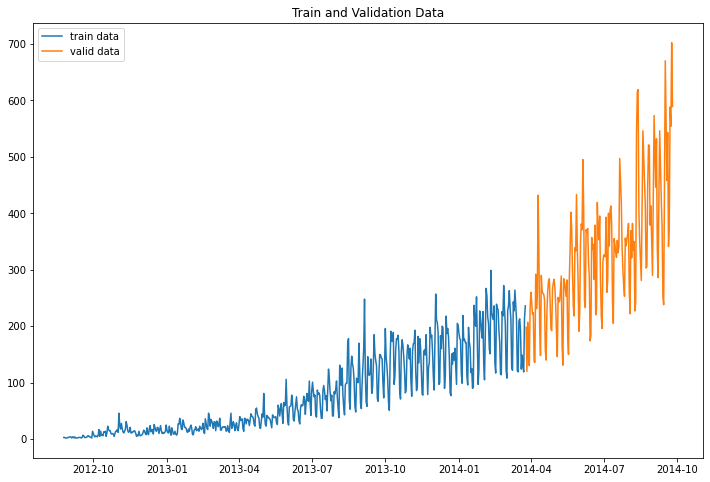

In [7]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index,train_data['count'],label='train data')
plt.plot(valid_data.index,valid_data['count'],label='valid data')
plt.legend(loc='best')
plt.title('Train and Validation Data')
plt.show()

In [8]:
valid_data.Date.min(),valid_data.Date.max()

('2014-03-26', '2014-09-25')

In [9]:
train_data.Date.min(),train_data.Date.max()

('2012-08-25', '2014-03-25')

In [10]:
print(train_data.shape)
train_data.tail()

(578, 2)


,Date,count
Date,,
2014-03-21,2014-03-21,149
2014-03-22,2014-03-22,129
2014-03-23,2014-03-23,119
2014-03-24,2014-03-24,214
2014-03-25,2014-03-25,236


In [11]:
train_data['count'][577] #index starts from 0

236

In [12]:
valid_data['naive']=train_data['count'][577]

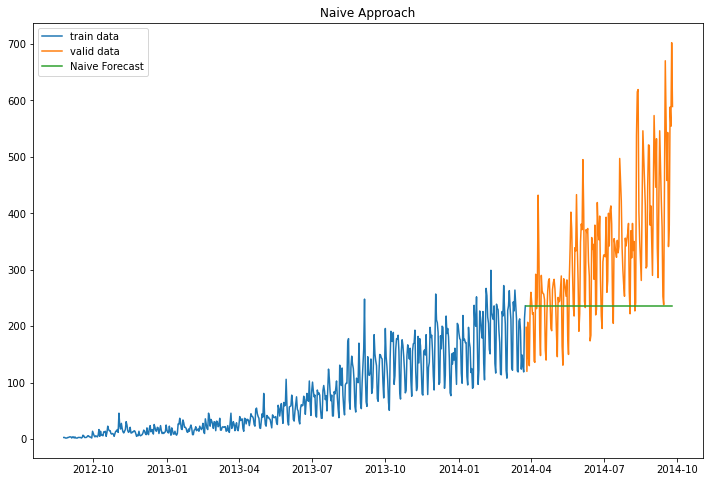

In [13]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index,train_data['count'],label='train data')
plt.plot(valid_data.index,valid_data['count'],label='valid data')
plt.plot(valid_data.index,valid_data['naive'],label='Naive Forecast')
plt.legend(loc='best')
plt.title('Naive Approach')
plt.show()

In [14]:
#calculating rmse

rmse_naive=sqrt(mean_squared_error(valid_data['count'],valid_data['naive']))
print('The RMSE value for Naive Approach',rmse_naive)

The RMSE value for Naive Approach 146.95130071764828


#### Simple Average Method

In [15]:
train_data['count'].mean()

78.18166089965398

In [16]:
valid_data['avg_complete']=train_data['count'].mean()

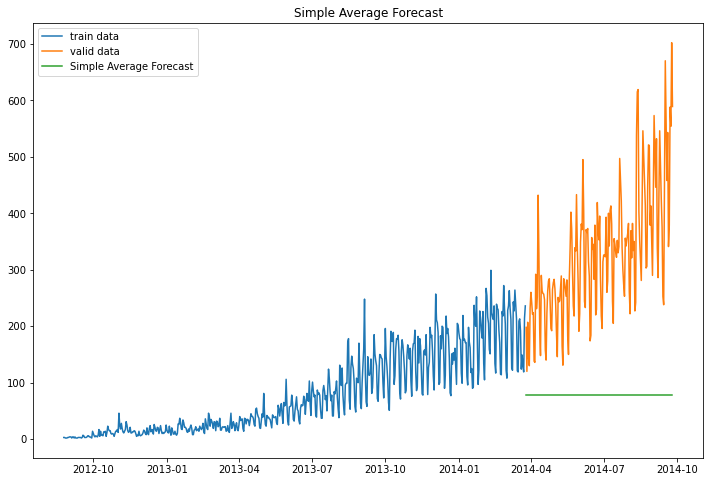

In [17]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index,train_data['count'],label='train data')
plt.plot(valid_data.index,valid_data['count'],label='valid data')
plt.plot(valid_data.index,valid_data['avg_complete'],label='Simple Average Forecast')
plt.legend(loc='best')
plt.title('Simple Average Forecast')
plt.show()

In [18]:
#calculating rmse

rmse_simple_avg=sqrt(mean_squared_error(valid_data['count'],valid_data['avg_complete']))
print('The RMSE value for Simple Average Approach',rmse_simple_avg)

The RMSE value for Simple Average Approach 274.7203499275037


In [19]:
#the initial values in train data are smaller,instead taking the complete average
#we should take avg of recent values

In [20]:
train_data.tail(7)

,Date,count
Date,,
2014-03-19,2014-03-19,192
2014-03-20,2014-03-20,124
2014-03-21,2014-03-21,149
2014-03-22,2014-03-22,129
2014-03-23,2014-03-23,119
2014-03-24,2014-03-24,214
2014-03-25,2014-03-25,236


In [21]:
temp=(train_data['count'][571:578]).values
print('Last week values are ',temp)
print('Avg of last week ',temp.mean())

Last week values are  [192 124 149 129 119 214 236]
Avg of last week  166.14285714285714


In [22]:
valid_data['avg_lastweek']=temp.mean()

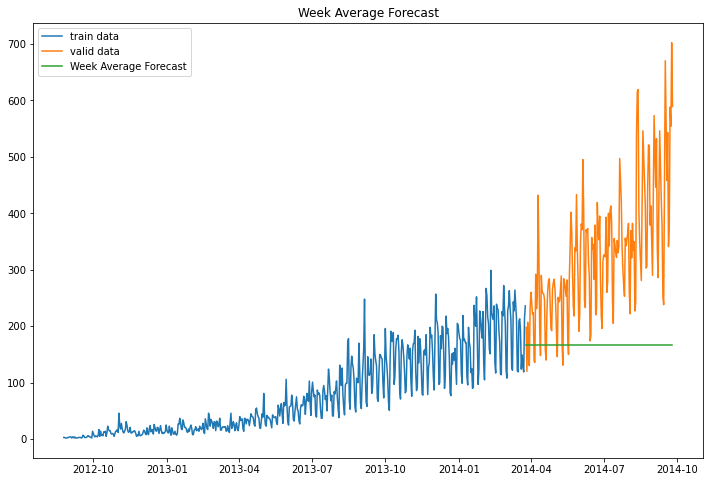

In [23]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index,train_data['count'],label='train data')
plt.plot(valid_data.index,valid_data['count'],label='valid data')
plt.plot(valid_data.index,valid_data['avg_lastweek'],label='Week Average Forecast')
plt.legend(loc='best')
plt.title('Week Average Forecast')
plt.show()

In [24]:
#calculating rmse

rmse_simple_week_avg=sqrt(mean_squared_error(valid_data['count'],valid_data['avg_lastweek']))
print('The RMSE value for Week Average Approach',rmse_simple_week_avg)

The RMSE value for Week Average Approach 198.23734967376558


#### Moving Average

In [33]:
valid_data['moving_avg'] = 0
week_values=[192,124,149,129,119,214,236]

In [53]:

for i in range(0,len(valid_data)):
    end=len(week_values)
    start=len(week_values)-7
    pred_v=mean(week_values[start:end])
    valid_data.loc[i,'moving_avg']=pred_v
    week_values.append(pred_v)
    

In [54]:
valid_data.head()

,Date,count,naive,avg_complete,avg_lastweek,moving_avg
Date,,,,,,
2014-03-26 00:00:00,2014-03-26,198.0,236.0,78.181661,166.142857,176.214286
2014-03-27 00:00:00,2014-03-27,120.0,236.0,78.181661,166.142857,176.214286
2014-03-28 00:00:00,2014-03-28,207.0,236.0,78.181661,166.142857,176.214286
2014-03-29 00:00:00,2014-03-29,145.0,236.0,78.181661,166.142857,176.214286
2014-03-30 00:00:00,2014-03-30,130.0,236.0,78.181661,166.142857,176.214286


In [45]:
week_values

[192,
 124,
 149,
 129,
 119,
 214,
 236,
 166.14285714285714,
 162.44897959183675,
 167.94169096209913,
 170.64764681382758,
 176.59731064437437,
 184.825497879285,
 180.65771186204,
 172.7516706994743,
 173.69578692184817,
 175.30247368327835,
 176.35401407201826,
 177.16920939461693,
 177.25090921608015,
 176.1688251213366,
 175.5275555869504,
 175.92411057087554,
 176.2424425207366,
 176.37672378323063,
 176.37996802768956,
 176.26721926098563,
 176.12669212454355,
 176.1206731250017,
 176.20540420186617,
 176.24558900629341,
 176.24603850423009,
 176.2273691786586,
 176.20556934308274,
 176.19676221195374,
 176.20677222444093,
 176.2190720957894,
 176.22102465206413,
 176.2175154586028,
 176.2134407377989,
 176.21145096053323,
 176.2122911915976,
 176.214509617261,
 176.21561495909242,
 176.21512108242143,
 176.21427771532962,
 176.21381518057632,
 176.21386867240165,
 176.21421405981144,
 176.21448875527057,
 176.2144857749862,
 176.21432446297104,
 176.2142106601924,
 176.214201

#### Weighted Moving Average

In [55]:
week_values=train_data['count'][571:578].values
week_values=week_values.tolist()

weights=[]
for i in range(1,8):
    W=i/13
    weights.append(W)

In [56]:
len(week_values),len(weights)

(7, 7)

In [58]:
for i in range(0,len(valid_data)):
    end=len(week_values)
    start=len(week_values)-7
    final_val=week_values[start:end]
    
    weighted_mean=0
    for j,k in zip(weights,final_val):
        weighted_mean +=j*k
        
    weighted_mean=weighted_mean/sum(weights)
    
    
    valid_data.loc[i,'weighted_avg']=weighted_mean
    week_values.append(weighted_mean)
        
    
    

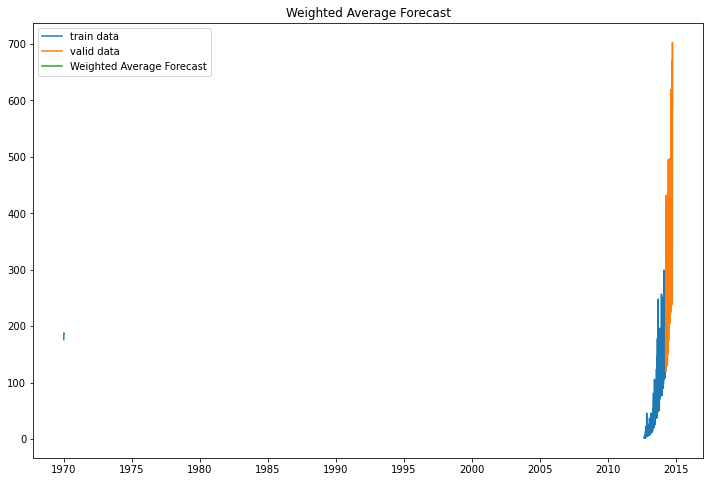

In [60]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index,train_data['count'],label='train data')
plt.plot(valid_data.index,valid_data['count'],label='valid data')
plt.plot(valid_data.index,valid_data['weighted_avg'],label='Weighted Average Forecast')
plt.legend(loc='best')
plt.title('Weighted Average Forecast')
plt.show()